In [1]:
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt

In [2]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Sparse arrays

In [4]:
y_sparse_train = np.zeros([60000,10])
y_sparse_test = np.zeros([10000,10])

In [5]:
for idx in range(60000):
    y_sparse_train[idx,train_y[idx]] = 1

for idx in range(10000):
    y_sparse_test[idx,test_y[idx]] = 1

In [6]:
y_sparse_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [7]:
y_sparse_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## Models

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.initializers import GlorotUniform, GlorotNormal, RandomNormal

### Softmax Regression

In [9]:
model_softmax = Sequential()

In [10]:
model_softmax.add(Flatten(input_shape=(28,28)))

In [11]:
model_softmax.add(Dense(10, activation="softmax"))

In [12]:
model_softmax.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


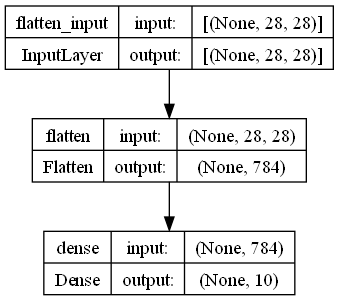

In [13]:
plot_model(model_softmax, show_shapes=True, show_layer_names=True, to_file='softmax_model.png')

In [14]:
model_softmax.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [15]:
history_softmax = model_softmax.fit(x=train_X, y=y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 16.2782 - accuracy: 0.7228 - val_loss: 11.9438 - val_accuracy: 0.7511
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 9.3185 - accuracy: 0.7833 - val_loss: 9.1628 - val_accuracy: 0.7816
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 7.9946 - accuracy: 0.7934 - val_loss: 8.9563 - val_accuracy: 0.7879
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 7.1607 - accuracy: 0.7998 - val_loss: 8.8650 - val_accuracy: 0.7681
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 6.6749 - accuracy: 0.8015 - val_loss: 10.1530 - val_accuracy: 0.7499
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 6.1808 - accuracy: 0.8061 - val_loss: 7.6553 - val_accuracy: 0.7688
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 5.8215 - accuracy: 0.8059 - val_loss: 6.0167 - val_accuracy: 0.8105
Epo

## MLP

In [16]:
model_mlp = Sequential()

In [17]:
model_mlp.add(Flatten(input_shape=(28,28)))

In [18]:
model_mlp.add(Dense(256, activation='relu'))
# model_mlp.add(Dropout(0.2))

In [19]:
model_mlp.add(Dense(128, activation='relu'))
# model_mlp.add(Dropout(0.2))

In [20]:
model_mlp.add(Dense(10, activation='softmax'))

In [21]:
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


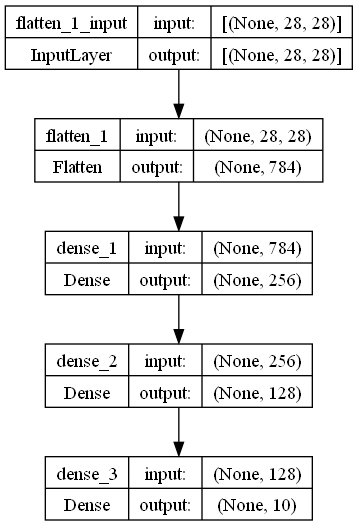

In [22]:
plot_model(model_mlp, show_shapes=True, show_layer_names=True, to_file='mlp_model.png')

In [23]:
model_mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history_mlp = model_mlp.fit(x=train_X, y=y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 4.0789 - accuracy: 0.7551 - val_loss: 1.0929 - val_accuracy: 0.7730
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7561 - accuracy: 0.8036 - val_loss: 0.6835 - val_accuracy: 0.7897
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5234 - accuracy: 0.8342 - val_loss: 0.5393 - val_accuracy: 0.8279
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.8499 - val_loss: 0.4881 - val_accuracy: 0.8323
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8611 - val_loss: 0.4646 - val_accuracy: 0.8472
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.8680 - val_loss: 0.5310 - val_accuracy: 0.8288
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8716 - val_loss: 0.4787 - val_accuracy: 0.8424
Epoch 

## Metrics

In [25]:
# Softmax Regression evaluation
y_pred_softmax = model_softmax.predict(test_X)
roc_auc_softmax = roc_auc_score(y_sparse_test, y_pred_softmax, multi_class='ovr', average='macro')
f1_macro_softmax = f1_score(y_sparse_test.argmax(axis=1), y_pred_softmax.argmax(axis=1), average='macro')
f1_micro_softmax = f1_score(y_sparse_test.argmax(axis=1), y_pred_softmax.argmax(axis=1), average='micro')
precision_softmax = precision_score(y_sparse_test.argmax(axis=1), y_pred_softmax.argmax(axis=1), average='macro')
recall_softmax = recall_score(y_sparse_test.argmax(axis=1), y_pred_softmax.argmax(axis=1), average='macro')

# MLP evaluation
y_pred_mlp = model_mlp.predict(test_X)
roc_auc_mlp = roc_auc_score(y_sparse_test, y_pred_mlp, multi_class='ovr', average='macro')
f1_macro_mlp = f1_score(y_sparse_test.argmax(axis=1), y_pred_mlp.argmax(axis=1), average='macro')
f1_micro_mlp = f1_score(y_sparse_test.argmax(axis=1), y_pred_mlp.argmax(axis=1), average='micro')
precision_mlp = precision_score(y_sparse_test.argmax(axis=1), y_pred_mlp.argmax(axis=1), average='macro')
recall_mlp = recall_score(y_sparse_test.argmax(axis=1), y_pred_mlp.argmax(axis=1), average='macro')

# Print the evaluation metrics
print("Softmax Regression:")
print("  Accuracy:", history_softmax.history['accuracy'][-1])
print("  ROC AUC:", roc_auc_softmax)
print("  F1-score (macro):", f1_macro_softmax)
print("  F1-score (micro):", f1_micro_softmax)
print("  Precision:", precision_softmax)
print("  Recall:", recall_softmax)

print("\nMLP:")
print("  Accuracy:", history_mlp.history['accuracy'][-1])
print("  ROC AUC:", roc_auc_mlp)
print("  F1-score (macro):", f1_macro_mlp)
print("  F1-score (micro):", f1_micro_mlp)
print("  Precision:", precision_mlp)
print("  Recall:", recall_mlp)

313/313 [==============================] - 0s 867us/step
Softmax Regression:
  Accuracy: 0.8125666379928589
  ROC AUC: 0.9700411777777778
  F1-score (macro): 0.7719321175959359
  F1-score (micro): 0.7761
  Precision: 0.8091041282257908
  Recall: 0.7760999999999999

MLP:
  Accuracy: 0.897766649723053
  ROC AUC: 0.9894824222222223
  F1-score (macro): 0.874396042352268
  F1-score (micro): 0.8742
  Precision: 0.8767927823941282
  Recall: 0.8741999999999999
